# Load Data and analyse features

In [215]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
#import the json split up csv
train = pd.read_csv("../train-v2.csv")


In [216]:
#set all NA in predicting column to 0 transaction amount
train['totals.transactionRevenue'].fillna(0, inplace = True)

In [217]:
#Goes through each feature and removes if has less than 2 unique values or more than 50% of its entries are null
def uniqValues(df):
    for colName in list(df):
        nuniq = df[colName].nunique()
        percNull = float(df[colName].isnull().sum().sum())/df.shape[0]
        print('{:<45}  {:>15} {:>15}'.format(colName, nuniq, percNull))
        if nuniq <2 or percNull > .5:
            df = df.drop(columns = [colName])
            print("deleted: " + colName)
        
    return df


train = train.drop(columns=['geoNetwork.networkDomain'])
train = uniqValues(train)



channelGrouping                                              8             0.0
fullVisitorId                                          1371486             0.0
visitId                                                1665802             0.0
visitNumber                                                457             0.0
device.browser                                             128 7.02437516719e-06
device.deviceCategory                                        3             0.0
device.isMobile                                              2             0.0
device.operatingSystem                                      23 0.0069160827167
geoNetwork.city                                            954  0.584677379229
deleted: geoNetwork.city
geoNetwork.continent                                         5 0.00147336269132
geoNetwork.country                                         227 0.00147336269132
geoNetwork.metro                                           121  0.772596390525
deleted: geoNetwork.met

In [218]:
#remove unnecessary columns
train = train.drop(columns = ['visitId', "trafficSource.medium", "device.deviceCategory", "dayofweek", "year"])
train.head()

,channelGrouping,fullVisitorId,visitNumber,device.browser,device.isMobile,device.operatingSystem,geoNetwork.continent,geoNetwork.country,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.transactionRevenue,trafficSource.source,month,hour,isWeekend
0,Organic Search,3162355547410993243,1,Firefox,False,Windows,Europe,Germany,Western Europe,1,1.0,1.0,0.0,google,10,0,0
1,Referral,8934116514970143966,6,Chrome,False,Chrome OS,Americas,United States,Northern America,2,2.0,2.0,0.0,sites.google.com,10,17,0
2,Direct,7992466427990357681,1,Chrome,True,Android,Americas,United States,Northern America,2,2.0,1.0,0.0,(direct),10,0,0
3,Organic Search,9075655783635761930,1,Chrome,False,Windows,Asia,Turkey,Western Asia,2,2.0,1.0,0.0,google,10,16,0
4,Organic Search,6960673291025684308,1,Chrome,False,Windows,Americas,Mexico,Central America,2,2.0,1.0,0.0,google,10,21,0


# Merge in Country Dataset

In [219]:
#Country dataset: https://www.kaggle.com/fernandol/countries-of-the-world



In [220]:
#population
#literacy
#Phones (per 1,000)
#climate
#GDP
countries = pd.read_csv("../countries.csv")
#Strip blank space and The in country names to match format of Kaggle
countries['Country'] = countries['Country'].str.strip()
countries['Country'] = countries['Country'].str.replace(", The", "", regex =False)

#Convert values to floats
countries['Literacy (%)'] = countries['Literacy (%)'].str.replace(",", ".", regex =False)
countries['Literacy (%)'] = countries['Literacy (%)'].astype(float)
countries['Phones (per 1000)'] = countries['Phones (per 1000)'].str.replace(",", ".", regex =False)
countries['Phones (per 1000)'] = countries['Phones (per 1000)'].astype(float)
countries['Pop. Density (per sq. mi.)'] = countries['Pop. Density (per sq. mi.)'].str.replace(",", ".", regex =False)
countries['Pop. Density (per sq. mi.)'] = countries['Pop. Density (per sq. mi.)'].astype(float)

countries = countries.drop(columns=['Region','Area (sq. mi.)','Coastline (coast/area ratio)',
'Net migration','Infant mortality (per 1000 births)','Arable (%)','Crops (%)','Other (%)','Birthrate',
                                    'Deathrate','Agriculture','Industry','Service', 'Climate'])


replLocList = [32,109,110,53,123,208,172,173,175,220,147,174,28,58,45,46,39,153,49,178,167,171,136]
CountryChangedList = ['Myanmar (Burma)', 'North Korea', 'South Korea','Czechia','Macedonia (FYROM)','Turks & Caicos Islands',
    'St. Kitts & Nevis','St. Lucia','St. Vincent & Grenadines','U.S. Virgin Islands','Caribbean Netherlands','St. Pierre & Miquelon',
    'British Virgin Islands','Timor-Leste','Congo - Kinshasa','Congo - Brazzaville','Central African Republic','Northern Mariana Islands', 
    'C\xc3\xb4te d\xe2\x80\x99Ivoire','S\xc3\xa3o Tom\xc3\xa9 & Pr\xc3\xadncipe','R\xc3\xa9union','St. Helena','Micronesia']
for cnt, replLoc in enumerate(replLocList): 
    print(str(replLoc) + ": Changing - " +  countries['Country'].iloc[replLoc] + " for " + CountryChangedList[cnt])
    
    
countries['Country'].iloc[32] = 'Myanmar (Burma)'
countries['Country'].iloc[109] = 'North Korea'
countries['Country'].iloc[110] = 'South Korea'
countries['Country'].iloc[53] = 'Czechia'
countries['Country'].iloc[123] = 'Macedonia (FYROM)'
countries['Country'].iloc[208] = 'Turks & Caicos Islands'
countries['Country'].iloc[172] = 'St. Kitts & Nevis'
countries['Country'].iloc[173] = 'St. Lucia'
countries['Country'].iloc[175] = 'St. Vincent & Grenadines'
countries['Country'].iloc[220] = 'U.S. Virgin Islands'
countries['Country'].iloc[147] = 'Caribbean Netherlands'
countries['Country'].iloc[174] = 'St. Pierre & Miquelon'
countries['Country'].iloc[28] = 'British Virgin Islands'
countries['Country'].iloc[58] = 'Timor-Leste'
countries['Country'].iloc[45] = 'Congo - Kinshasa'
countries['Country'].iloc[46] = 'Congo - Brazzaville'
countries['Country'].iloc[39] = 'Central African Republic'
countries['Country'].iloc[153] = 'Northern Mariana Islands'
countries['Country'].iloc[49] = 'C\xc3\xb4te d\xe2\x80\x99Ivoire'
countries['Country'].iloc[178] = 'S\xc3\xa3o Tom\xc3\xa9 & Pr\xc3\xadncipe'
countries['Country'].iloc[167] = 'R\xc3\xa9union'
countries['Country'].iloc[171] = 'St. Helena'
countries['Country'].iloc[136] = 'Micronesia'

train = pd.merge(train, countries, left_on = "geoNetwork.country", right_on = "Country", how = 'left')
train = train.drop(columns=['Country', 'geoNetwork.country'])

32: Changing - Burma for Myanmar (Burma)
109: Changing - Korea, North for North Korea
110: Changing - Korea, South for South Korea
53: Changing - Czech Republic for Czechia
123: Changing - Macedonia for Macedonia (FYROM)
208: Changing - Turks & Caicos Is for Turks & Caicos Islands
172: Changing - Saint Kitts & Nevis for St. Kitts & Nevis
173: Changing - Saint Lucia for St. Lucia
175: Changing - Saint Vincent and the Grenadines for St. Vincent & Grenadines
220: Changing - Virgin Islands for U.S. Virgin Islands
147: Changing - Netherlands Antilles for Caribbean Netherlands
174: Changing - St Pierre & Miquelon for St. Pierre & Miquelon
28: Changing - British Virgin Is. for British Virgin Islands
58: Changing - East Timor for Timor-Leste
45: Changing - Congo, Dem. Rep. for Congo - Kinshasa
46: Changing - Congo, Repub. of the for Congo - Brazzaville
39: Changing - Central African Rep. for Central African Republic
153: Changing - N. Mariana Islands for Northern Mariana Islands
49: Changing -

# Feature Graphs

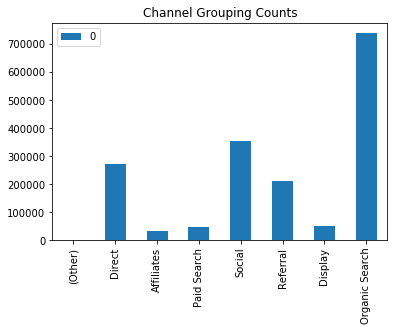

In [221]:
train['channelGrouping'].unique()
from collections import Counter
wordCnts = Counter(train['channelGrouping'])
df = pd.DataFrame.from_dict(wordCnts, orient='index')
%matplotlib inline
df.plot(kind='bar', title = "Channel Grouping Counts")

array(['Windows', 'Chrome OS', 'Android', 'Macintosh', 'iOS', 'Linux',
       nan, 'Windows Phone', 'Samsung', 'Tizen', 'BlackBerry', 'OS/2',
       'Playstation Vita', 'Xbox', 'Nintendo Wii', 'Firefox OS',
       'Nintendo 3DS', 'Nintendo WiiU', 'SymbianOS', 'FreeBSD', 'Nokia',
       'OpenBSD', 'SunOS', 'NTT DoCoMo'], dtype=object)

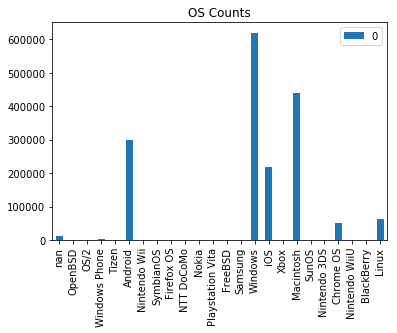

In [222]:

os = Counter(train['device.operatingSystem'])
df = pd.DataFrame.from_dict(os, orient='index')
%matplotlib inline
df.plot(kind='bar', title = "OS Counts")
train['device.operatingSystem'].unique()

# Is Chrome Feature

In [223]:
train.loc[train["device.browser"]!="Chrome","device.browser"] = 0
train.loc[train["device.browser"]=="Chrome", "device.browser"] = 1
train.rename(columns={'device.browser': 'device.browser.isChrome'}, inplace=True)



# isWindowsOS

In [224]:
train.loc[train["device.operatingSystem"]!="Windows","device.operatingSystem"] = 0
train.loc[train["device.operatingSystem"]=="Windows", "device.operatingSystem"] = 1
train.rename(columns={'device.operatingSystem': 'os.isWindows'}, inplace=True)



# Hour to Morning, Afternoon, Evening, Night

In [225]:
train['hour'].unique()

timeOfDay = [None] * len(train['hour'])
for cnt,hr in enumerate(train['hour']):
    if hr <6:
        timeOfDay[cnt] = "Night"
    elif hr <12:
        timeOfDay[cnt] = "Morning"
    elif hr <17:
        timeOfDay[cnt] = "Afternoon"
    elif hr < 20:
        timeOfDay[cnt] = "Evening"
    else:
        timeOfDay[cnt] = "Night"
        
train['timeOfDay'] = timeOfDay
train = train.drop(columns = ['hour'])

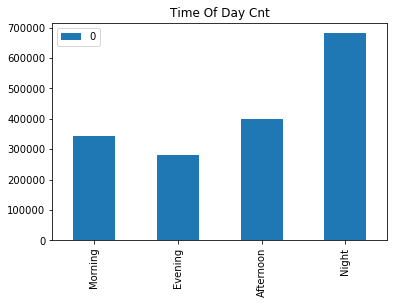

In [226]:
tod = Counter(timeOfDay)
df = pd.DataFrame.from_dict(tod, orient='index')
%matplotlib inline
df.plot(kind='bar', title = "Time Of Day Cnt")

# isDecember

In [227]:
isDec = train['month'].copy()
isDec[isDec !=12] = 0
isDec[isDec == 12] = 1

train['isDec'] = isDec

# season

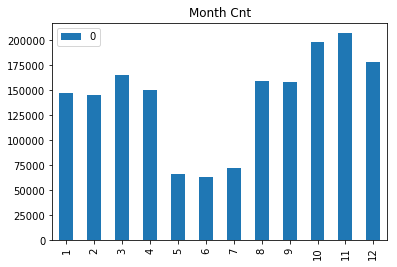

In [228]:
month = Counter(train['month'])
df = pd.DataFrame.from_dict(month, orient='index')
%matplotlib inline
df.plot(kind='bar', title = "Month Cnt")

In [229]:

season = [None] * len(train['month'])
for cnt,s in enumerate(train['month']):
    if s <3:
        season[cnt] = "Winter"
    elif s <6:
        season[cnt] = "Spring"
    elif s <9:
        season[cnt] = "Summer"
    elif s < 12:
        season[cnt] = "Fall"
    else:
        season[cnt] = "Winter"
train['season'] = season
train = train.drop(columns = ['month'])

# Traffic Source Is Direct


In [230]:
train_direct = train[train["trafficSource.source"]=="(direct)"]
train.loc[train["trafficSource.source"]!="(direct)","trafficSource.source"] = 0
train.loc[train["trafficSource.source"]=="(direct)", "trafficSource.source"] =1
train.rename(columns={'trafficSource.source': 'trafficSource.isdirect'}, inplace=True)

In [231]:
train.head()

,channelGrouping,fullVisitorId,visitNumber,device.browser.isChrome,device.isMobile,os.isWindows,geoNetwork.continent,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.transactionRevenue,trafficSource.isdirect,isWeekend,Population,Pop. Density (per sq. mi.),GDP ($ per capita),Literacy (%),Phones (per 1000),timeOfDay,isDec,season
0,Organic Search,3162355547410993243,1,0,False,1,Europe,Western Europe,1,1.0,1.0,0.0,0,0,82422299.0,230.9,27600.0,99.0,667.9,Night,0,Fall
1,Referral,8934116514970143966,6,1,False,0,Americas,Northern America,2,2.0,2.0,0.0,0,0,298444215.0,31.0,37800.0,97.0,898.0,Evening,0,Fall
2,Direct,7992466427990357681,1,1,True,0,Americas,Northern America,2,2.0,1.0,0.0,1,0,298444215.0,31.0,37800.0,97.0,898.0,Night,0,Fall
3,Organic Search,9075655783635761930,1,1,False,1,Asia,Western Asia,2,2.0,1.0,0.0,0,0,70413958.0,90.2,6700.0,86.5,269.5,Afternoon,0,Fall
4,Organic Search,6960673291025684308,1,1,False,1,Americas,Central America,2,2.0,1.0,0.0,0,0,107449525.0,54.5,9000.0,92.2,181.6,Night,0,Fall


# One-Hot-Encode

In [232]:
train['geoNetwork.subContinent'].unique()

array(['Western Europe', 'Northern America', 'Western Asia',
       'Central America', 'Northern Europe', 'Southern Asia',
       'Southeast Asia', 'Eastern Europe', 'South America',
       'Eastern Asia', 'Southern Europe', 'Australasia', 'Central Asia',
       nan, 'Northern Africa', 'Eastern Africa', 'Southern Africa',
       'Western Africa', 'Caribbean', 'Middle Africa', 'Melanesia',
       'Micronesian Region', 'Polynesia'], dtype=object)

In [233]:
train = pd.get_dummies(train,columns=['geoNetwork.continent', 'geoNetwork.subContinent', 'channelGrouping', 'timeOfDay', 'season'])


In [234]:
train.head()

,fullVisitorId,visitNumber,device.browser.isChrome,device.isMobile,os.isWindows,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.transactionRevenue,trafficSource.isdirect,isWeekend,Population,Pop. Density (per sq. mi.),GDP ($ per capita),Literacy (%),Phones (per 1000),isDec,geoNetwork.continent_Africa,geoNetwork.continent_Americas,geoNetwork.continent_Asia,geoNetwork.continent_Europe,geoNetwork.continent_Oceania,geoNetwork.subContinent_Australasia,geoNetwork.subContinent_Caribbean,geoNetwork.subContinent_Central America,geoNetwork.subContinent_Central Asia,geoNetwork.subContinent_Eastern Africa,geoNetwork.subContinent_Eastern Asia,geoNetwork.subContinent_Eastern Europe,geoNetwork.subContinent_Melanesia,geoNetwork.subContinent_Micronesian Region,geoNetwork.subContinent_Middle Africa,geoNetwork.subContinent_Northern Africa,geoNetwork.subContinent_Northern America,geoNetwork.subContinent_Northern Europe,geoNetwork.subContinent_Polynesia,geoNetwork.subContinent_South America,geoNetwork.subContinent_Southeast Asia,geoNetwork.subContinent_Southern Africa,geoNetwork.subContinent_Southern Asia,geoNetwork.subContinent_Southern Europe,geoNetwork.subContinent_Western Africa,geoNetwork.subContinent_Western Asia,geoNetwork.subContinent_Western Europe,channelGrouping_(Other),channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night,season_Fall,season_Spring,season_Summer,season_Winter
0,3162355547410993243,1,0,False,1,1,1.0,1.0,0.0,0,0,82422299.0,230.9,27600.0,99.0,667.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,8934116514970143966,6,1,False,0,2,2.0,2.0,0.0,0,0,298444215.0,31.0,37800.0,97.0,898.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,7992466427990357681,1,1,True,0,2,2.0,1.0,0.0,1,0,298444215.0,31.0,37800.0,97.0,898.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9075655783635761930,1,1,False,1,2,2.0,1.0,0.0,0,0,70413958.0,90.2,6700.0,86.5,269.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,6960673291025684308,1,1,False,1,2,2.0,1.0,0.0,0,0,107449525.0,54.5,9000.0,92.2,181.6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


# Normalize numerical data

In [235]:
list(train)

['fullVisitorId',
 'visitNumber',
 'device.browser.isChrome',
 'device.isMobile',
 'os.isWindows',
 'totals.hits',
 'totals.pageviews',
 'totals.sessionQualityDim',
 'totals.transactionRevenue',
 'trafficSource.isdirect',
 'isWeekend',
 'Population',
 'Pop. Density (per sq. mi.)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'isDec',
 'geoNetwork.continent_Africa',
 'geoNetwork.continent_Americas',
 'geoNetwork.continent_Asia',
 'geoNetwork.continent_Europe',
 'geoNetwork.continent_Oceania',
 'geoNetwork.subContinent_Australasia',
 'geoNetwork.subContinent_Caribbean',
 'geoNetwork.subContinent_Central America',
 'geoNetwork.subContinent_Central Asia',
 'geoNetwork.subContinent_Eastern Africa',
 'geoNetwork.subContinent_Eastern Asia',
 'geoNetwork.subContinent_Eastern Europe',
 'geoNetwork.subContinent_Melanesia',
 'geoNetwork.subContinent_Micronesian Region',
 'geoNetwork.subContinent_Middle Africa',
 'geoNetwork.subContinent_Northern Africa',
 'geoNetwork.subContinen

In [236]:

from sklearn import preprocessing
from scipy.stats import zscore

numericalCols = ['visitNumber', 'totals.hits','totals.pageviews', 'totals.sessionQualityDim', 'Population',
 'Pop. Density (per sq. mi.)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)']
#go through list of numberical columns to normalize
def normNumericalCol(numericalCols, df):
    for col in list(numericalCols):
        x = df[col].copy()
        temp = df[col].copy()
        x[~np.isnan(temp)] = zscore(temp[~np.isnan(temp)])
        df[col] = x
    return df

train = normNumericalCol(numericalCols, train)

In [237]:
train.head()

,fullVisitorId,visitNumber,device.browser.isChrome,device.isMobile,os.isWindows,totals.hits,totals.pageviews,totals.sessionQualityDim,totals.transactionRevenue,trafficSource.isdirect,isWeekend,Population,Pop. Density (per sq. mi.),GDP ($ per capita),Literacy (%),Phones (per 1000),isDec,geoNetwork.continent_Africa,geoNetwork.continent_Americas,geoNetwork.continent_Asia,geoNetwork.continent_Europe,geoNetwork.continent_Oceania,geoNetwork.subContinent_Australasia,geoNetwork.subContinent_Caribbean,geoNetwork.subContinent_Central America,geoNetwork.subContinent_Central Asia,geoNetwork.subContinent_Eastern Africa,geoNetwork.subContinent_Eastern Asia,geoNetwork.subContinent_Eastern Europe,geoNetwork.subContinent_Melanesia,geoNetwork.subContinent_Micronesian Region,geoNetwork.subContinent_Middle Africa,geoNetwork.subContinent_Northern Africa,geoNetwork.subContinent_Northern America,geoNetwork.subContinent_Northern Europe,geoNetwork.subContinent_Polynesia,geoNetwork.subContinent_South America,geoNetwork.subContinent_Southeast Asia,geoNetwork.subContinent_Southern Africa,geoNetwork.subContinent_Southern Asia,geoNetwork.subContinent_Southern Europe,geoNetwork.subContinent_Western Africa,geoNetwork.subContinent_Western Asia,geoNetwork.subContinent_Western Europe,channelGrouping_(Other),channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night,season_Fall,season_Spring,season_Summer,season_Winter
0,3162355547410993243,-0.142737,0,False,1,-0.381416,-0.416515,-0.241964,0.0,0,0,-0.559015,0.042366,0.178387,0.545663,0.300013,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,8934116514970143966,0.391791,1,False,0,-0.270203,-0.262033,-0.153933,0.0,0,0,0.260052,-0.225730,0.925696,0.370510,1.016827,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,7992466427990357681,-0.142737,1,True,0,-0.270203,-0.262033,-0.241964,0.0,1,0,0.260052,-0.225730,0.925696,0.370510,1.016827,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9075655783635761930,-0.142737,1,False,1,-0.270203,-0.262033,-0.241964,0.0,0,0,-0.604546,-0.146334,-1.352865,-0.549045,-0.941094,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,6960673291025684308,-0.142737,1,False,1,-0.270203,-0.262033,-0.241964,0.0,0,0,-0.464122,-0.194213,-1.184354,-0.049858,-1.214923,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [238]:
train.to_csv("cleaned_train.csv")

In [239]:
train.shape

(1708337, 60)